In [59]:
## Downloading data
# ! wget --output-document "../data/raw/universum_compressed.tar" http://sereja.me/f/universum_compressed.tar

In [60]:
## Preprocessing data for using with model
# ! tar xf "../data/raw/universum_compressed.tar" --directory="../data/preprocessed/"

In [61]:
import matplotlib.pyplot as plt
from pathlib import Path
import skimage.io as io
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from random import shuffle
import random
from PIL import Image

pl.seed_everything(0)
random.seed(0)
from easydict import EasyDict

Global seed set to 0


In [62]:
config = EasyDict(
    dataset_dir=Path("../data/preprocessed/universum-photos"),
)

In [63]:
image_ext = ['.jpg', '.JPG', '.png']


def collect_images_files(path_dir: Path):
    assert path_dir.is_dir()

    images = []
    for path in path_dir.glob("**/*"):
        if path.is_file() and path.suffix in image_ext:
            images.append(path)

    print(f"Found images in {str(path_dir)}: {len(images)}")
    return images


Training images
Found images in ../data/preprocessed/universum-photos: 1254


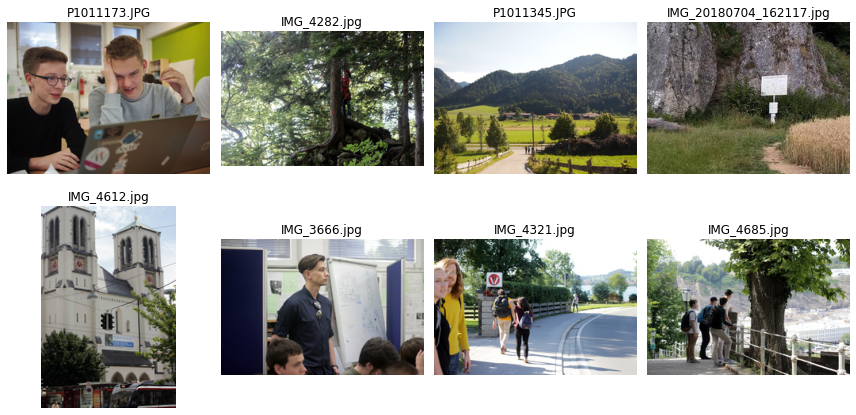

In [64]:
def visualize_dataset(dataset_dir: Path, n_rows=2, n_cols=4):
    n_samples = n_rows * n_cols
    paths = collect_images_files(dataset_dir)
    shuffle(paths)
    figure, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6))

    for ii, path in enumerate(paths[:n_samples]):
        image = io.imread(str(path))
        name = path.name

        ax.ravel()[ii].imshow(image)
        ax.ravel()[ii].set_title(name)
        ax.ravel()[ii].set_axis_off()

    plt.tight_layout()
    plt.show()


print("Training images")
visualize_dataset(config.dataset_dir)


In [65]:
train_transforms = transforms.Compose([
    transforms.RandomCrop(size=128),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=90),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

val_transform = transforms.Compose([
    transforms.RandomCrop(size=128),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

Visualizing augmented dataset
Found images in ../data/preprocessed/universum-photos: 1254


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


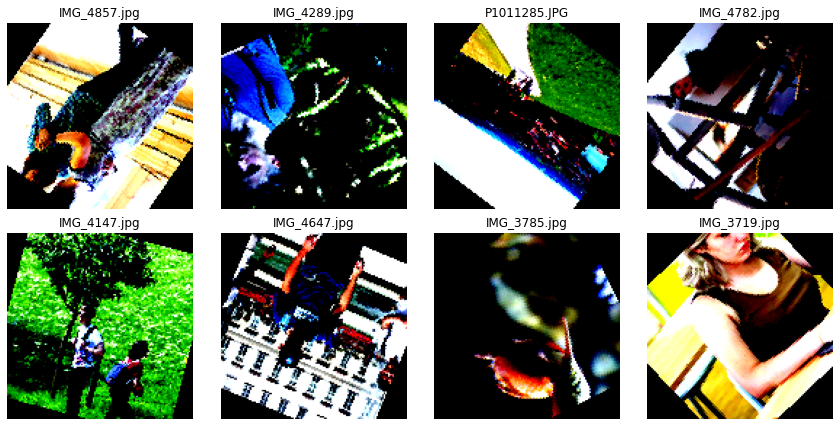

In [66]:
import torch


def visualize_augmented_dataset(dataset_dir: Path, transform, n_rows=2, n_cols=4):
    n_samples = n_rows * n_cols
    paths = collect_images_files(dataset_dir)
    shuffle(paths)
    figure, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6))

    for ii, path in enumerate(paths[:n_samples]):
        image = Image.open(str(path))
        image = transform(image).permute(1, 2, 0).numpy()
        name = path.name

        ax.ravel()[ii].imshow(image)
        ax.ravel()[ii].set_title(name)
        ax.ravel()[ii].set_axis_off()

    plt.tight_layout()
    plt.show()

    pass


print("Visualizing augmented dataset")
visualize_augmented_dataset(config.dataset_dir, train_transforms)


In [67]:
# class ImageDataset(Dataset):
#     def __init__(self, data_dir: Path, transform: ):
#         super(ImageDataset, self).__init__()
#         assert data_dir.is_dir()
#
#         self.paths = collect_images_files(data_dir)
#
#     def __getitem__(self, item):
#         image = io.imread(item)
#
#
#
#
#
# class ImageDataLoader(pl.LightningDataModule):
#     def __init__(self, data_dir: Path):
#         super(ImageDataLoader, self).__init__()
#
#         Dara








